# 1st Part 

#### Getting Data

In [325]:
df=pd.read_html("https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M")[0]

In [326]:
df.head()

,Postcode,Borough,Neighbourhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Harbourfront


In [327]:
df.isnull().sum()

Postcode         0
Borough          0
Neighbourhood    0
dtype: int64

In [328]:
df.shape

(288, 3)

#### Removing Borough where Not assigned 

In [329]:
df=df[df['Borough']!='Not assigned']

In [330]:
df=df.reset_index()

In [331]:
df.head()

,index,Postcode,Borough,Neighbourhood
0,2,M3A,North York,Parkwoods
1,3,M4A,North York,Victoria Village
2,4,M5A,Downtown Toronto,Harbourfront
3,5,M5A,Downtown Toronto,Regent Park
4,6,M6A,North York,Lawrence Heights


In [332]:
df=df[['Postcode','Borough','Neighbourhood']]

In [333]:
df.head()

,Postcode,Borough,Neighbourhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,Harbourfront
3,M5A,Downtown Toronto,Regent Park
4,M6A,North York,Lawrence Heights


#### Making data in the asked form

In [334]:
df=df.groupby(['Postcode','Borough'], sort = False).agg(lambda x: ','.join(x))

In [335]:
df.head()

,,Neighbourhood
Postcode,Borough,
M3A,North York,Parkwoods
M4A,North York,Victoria Village
M5A,Downtown Toronto,"Harbourfront,Regent Park"
M6A,North York,"Lawrence Heights,Lawrence Manor"
M7A,Queen's Park,Not assigned


In [336]:
df=df.reset_index()

In [337]:
df.head()

,Postcode,Borough,Neighbourhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Harbourfront,Regent Park"
3,M6A,North York,"Lawrence Heights,Lawrence Manor"
4,M7A,Queen's Park,Not assigned


#### make data into required form

In [338]:
for i,j in df.iterrows():
    if(df.loc[i,'Neighbourhood']=='Not assigned'):
        df.loc[i,'Neighbourhood']=df.loc[i,'Borough']

In [339]:
df.head()

,Postcode,Borough,Neighbourhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Harbourfront,Regent Park"
3,M6A,North York,"Lawrence Heights,Lawrence Manor"
4,M7A,Queen's Park,Queen's Park


In [340]:
df.shape

(103, 3)

# 2nd Part

In [341]:
postal_codes=pd.read_csv('Geospatial_Coordinates.csv')

In [342]:
postal_codes.columns=['Postcode','Latitude','Longitude']

In [343]:
postal_codes.head()

,Postcode,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [344]:
df=pd.merge(df,postal_codes,on='Postcode')

In [345]:
df.head()

,Postcode,Borough,Neighbourhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Harbourfront,Regent Park",43.654260,-79.360636
3,M6A,North York,"Lawrence Heights,Lawrence Manor",43.718518,-79.464763
4,M7A,Queen's Park,Queen's Park,43.662301,-79.389494


In [346]:
df.shape

(103, 5)

In [347]:
df.isnull().sum()

Postcode         0
Borough          0
Neighbourhood    0
Latitude         0
Longitude        0
dtype: int64

# 3rd Part

In [348]:
x=df['Latitude']

In [349]:
y=df['Longitude']

In [350]:
import matplotlib.pyplot as plt 

In [351]:
df=df[df["Borough"].str.split().str[-1]=='Toronto']

In [352]:
df.head()

,Postcode,Borough,Neighbourhood,Latitude,Longitude
2,M5A,Downtown Toronto,"Harbourfront,Regent Park",43.654260,-79.360636
9,M5B,Downtown Toronto,"Ryerson,Garden District",43.657162,-79.378937
15,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418
19,M4E,East Toronto,The Beaches,43.676357,-79.293031
20,M5E,Downtown Toronto,Berczy Park,43.644771,-79.373306


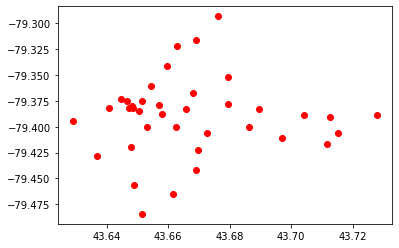

In [353]:
x=df['Latitude']
y=df['Longitude']
plt.plot(x,y,'ro')

In [354]:
print('The dataframe has {} boroughs and {} neighborhoods.'.format(
        len(df["Borough"].unique()),
        df.shape[0]
    )
)

The dataframe has 4 boroughs and 38 neighborhoods.


In [355]:
df.shape

(38, 5)

In [356]:
df

,Postcode,Borough,Neighbourhood,Latitude,Longitude
2,M5A,Downtown Toronto,"Harbourfront,Regent Park",43.654260,-79.360636
9,M5B,Downtown Toronto,"Ryerson,Garden District",43.657162,-79.378937
15,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418
19,M4E,East Toronto,The Beaches,43.676357,-79.293031
20,M5E,Downtown Toronto,Berczy Park,43.644771,-79.373306
24,M5G,Downtown Toronto,Central Bay Street,43.657952,-79.387383
25,M6G,Downtown Toronto,Christie,43.669542,-79.422564
30,M5H,Downtown Toronto,"Adelaide,King,Richmond",43.650571,-79.384568
31,M6H,West Toronto,"Dovercourt Village,Dufferin",43.669005,-79.442259
36,M5J,Downtown Toronto,"Harbourfront East,Toronto Islands,Union Station",43.640816,-79.381752


In [357]:
!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim
address = 'Toronto'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))

Solving environment: ...working... done

# All requested packages already installed.

The geograpical coordinate of Toronto are 43.653963, -79.387207.


In [359]:
import folium # map rendering library
# create map of Manhattan using latitude and longitude values
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, Neighborhood in zip(df['Latitude'], df['Longitude'], df['Borough'], df['Neighbourhood']):
    label = '{}, {}'.format(Neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

In [360]:
CLIENT_ID = 'CQMI1WVKP2W2Q3NULIIAPL1ZVVCUIUFI2HIGY2IQIW1A11PU' # your Foursquare ID
CLIENT_SECRET = 'Z0VHKYIGRJ5R0DUFHZXB5P4DFLQ3JOZ2XIE130WHPTL0QSVI' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: CQMI1WVKP2W2Q3NULIIAPL1ZVVCUIUFI2HIGY2IQIW1A11PU
CLIENT_SECRET:Z0VHKYIGRJ5R0DUFHZXB5P4DFLQ3JOZ2XIE130WHPTL0QSVI


In [307]:
# defining radius and limit of venues to get
radius=500
LIMIT=100

In [361]:
Toronto_df=df

In [362]:
Toronto_df=Toronto_df.reset_index()

In [363]:
Toronto_df.head()

,index,Postcode,Borough,Neighbourhood,Latitude,Longitude
0,2,M5A,Downtown Toronto,"Harbourfront,Regent Park",43.654260,-79.360636
1,9,M5B,Downtown Toronto,"Ryerson,Garden District",43.657162,-79.378937
2,15,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418
3,19,M4E,East Toronto,The Beaches,43.676357,-79.293031
4,20,M5E,Downtown Toronto,Berczy Park,43.644771,-79.373306


In [364]:
Toronto_df.loc[0, 'Neighbourhood']

'Harbourfront,Regent Park'

In [365]:
Toronto_df.columns=['index','Postcode','Borough','Neighborhood','Latitude','Longitude']

In [366]:
neighborhood_latitude = Toronto_df.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = Toronto_df.loc[0, 'Longitude'] # neighborhood longitude value

neighborhood_name = Toronto_df.loc[0, 'Neighborhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Harbourfront,Regent Park are 43.6542599, -79.3606359.


In [367]:
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)

In [368]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5d6bc1ed2b274a003958f791'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Corktown',
  'headerFullLocation': 'Corktown, Toronto',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 51,
  'suggestedBounds': {'ne': {'lat': 43.6587599045, 'lng': -79.3544279001486},
   'sw': {'lat': 43.6497598955, 'lng': -79.36684389985142}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '54ea41ad498e9a11e9e13308',
       'name': 'Roselle Desserts',
       'location': {'address': '362 King St E',
        'crossStreet': 'Trinity St',
        'lat': 43.653446723052674,
        'lng': -79.3620167174383,
        'labeledLatLngs': [{'label': 'display',
 

In [369]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [370]:
import json # library to handle JSON files
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.cluster import KMeans
import folium # map rendering library
print('Libraries imported.')

Libraries imported.


In [371]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,Roselle Desserts,Bakery,43.653447,-79.362017
1,Tandem Coffee,Coffee Shop,43.653559,-79.361809
2,Toronto Cooper Koo Family Cherry St YMCA Centre,Gym / Fitness Center,43.653191,-79.357947
3,Body Blitz Spa East,Spa,43.654735,-79.359874
4,Impact Kitchen,Restaurant,43.656369,-79.356980


In [372]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

51 venues were returned by Foursquare.


In [373]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [374]:
toronto_venues = getNearbyVenues(names=Toronto_df['Neighborhood'],
                                   latitudes=Toronto_df['Latitude'],
                                   longitudes=Toronto_df['Longitude']
                                  )

Harbourfront,Regent Park
Ryerson,Garden District
St. James Town
The Beaches
Berczy Park
Central Bay Street
Christie
Adelaide,King,Richmond
Dovercourt Village,Dufferin
Harbourfront East,Toronto Islands,Union Station
Little Portugal,Trinity
The Danforth West,Riverdale
Design Exchange,Toronto Dominion Centre
Brockton,Exhibition Place,Parkdale Village
The Beaches West,India Bazaar
Commerce Court,Victoria Hotel
Studio District
Lawrence Park
Roselawn
Davisville North
Forest Hill North,Forest Hill West
High Park,The Junction South
North Toronto West
The Annex,North Midtown,Yorkville
Parkdale,Roncesvalles
Davisville
Harbord,University of Toronto
Runnymede,Swansea
Moore Park,Summerhill East
Chinatown,Grange Park,Kensington Market
Deer Park,Forest Hill SE,Rathnelly,South Hill,Summerhill West
CN Tower,Bathurst Quay,Island airport,Harbourfront West,King and Spadina,Railway Lands,South Niagara
Rosedale
Stn A PO Boxes 25 The Esplanade
Cabbagetown,St. James Town
First Canadian Place,Underground city


In [375]:
print(toronto_venues.shape)
toronto_venues.head()

(1706, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Harbourfront,Regent Park",43.65426,-79.360636,Roselle Desserts,43.653447,-79.362017,Bakery
1,"Harbourfront,Regent Park",43.65426,-79.360636,Tandem Coffee,43.653559,-79.361809,Coffee Shop
2,"Harbourfront,Regent Park",43.65426,-79.360636,Toronto Cooper Koo Family Cherry St YMCA Centre,43.653191,-79.357947,Gym / Fitness Center
3,"Harbourfront,Regent Park",43.65426,-79.360636,Body Blitz Spa East,43.654735,-79.359874,Spa
4,"Harbourfront,Regent Park",43.65426,-79.360636,Impact Kitchen,43.656369,-79.356980,Restaurant


In [376]:
toronto_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
"Adelaide,King,Richmond",100,100,100,100,100,100
Berczy Park,56,56,56,56,56,56
"Brockton,Exhibition Place,Parkdale Village",22,22,22,22,22,22
Business Reply Mail Processing Centre 969 Eastern,17,17,17,17,17,17
"CN Tower,Bathurst Quay,Island airport,Harbourfront West,King and Spadina,Railway Lands,South Niagara",15,15,15,15,15,15
"Cabbagetown,St. James Town",43,43,43,43,43,43
Central Bay Street,86,86,86,86,86,86
"Chinatown,Grange Park,Kensington Market",100,100,100,100,100,100
Christie,16,16,16,16,16,16


In [377]:
print('There are {} uniques categories.'.format(len(toronto_venues['Venue Category'].unique())))

There are 236 uniques categories.


In [378]:
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
toronto_onehot['Neighborhood'] = toronto_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])
toronto_onehot = toronto_onehot[fixed_columns]

toronto_onehot.head()

,Yoga Studio,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,...,Theme Restaurant,Thrift / Vintage Store,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wings Joint
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [379]:
toronto_onehot.shape

(1706, 236)

In [380]:
toronto_grouped = toronto_onehot.groupby('Neighborhood').mean().reset_index()
toronto_grouped

,Neighborhood,Yoga Studio,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,...,Theme Restaurant,Thrift / Vintage Store,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wings Joint
0,"Adelaide,King,Richmond",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.030000,...,0.000000,0.00,0.000000,0.000000,0.00,0.020000,0.000000,0.000000,0.010000,0.000000
1,Berczy Park,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00,0.000000,0.000000,0.00,0.017857,0.000000,0.000000,0.000000,0.000000
2,"Brockton,Exhibition Place,Parkdale Village",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000
3,Business Reply Mail Processing Centre 969 Eastern,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000
4,"CN Tower,Bathurst Quay,Island airport,Harbourf...",0.000000,0.000000,0.066667,0.066667,0.066667,0.133333,0.133333,0.066667,0.000000,...,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000
5,"Cabbagetown,St. James Town",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000
6,Central Bay Street,0.011628,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.011628,...,0.000000,0.00,0.000000,0.000000,0.00,0.011628,0.000000,0.000000,0.011628,0.000000
7,"Chinatown,Grange Park,Kensington Market",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.01,0.000000,0.000000,0.00,0.060000,0.000000,0.040000,0.010000,0.000000
8,Christie,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000
9,Church and Wellesley,0.011628,0.011628,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.011628,...,0.011628,0.00,0.000000,0.000000,0.00,0.000000,0.011628,0.011628,0.000000,0.011628


In [381]:
toronto_grouped.shape

(38, 236)

In [382]:
num_top_venues = 3

for hood in toronto_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = toronto_grouped[toronto_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Adelaide,King,Richmond----
         venue  freq
0  Coffee Shop  0.08
1         Café  0.05
2   Steakhouse  0.04


----Berczy Park----
          venue  freq
0   Coffee Shop  0.09
1  Cocktail Bar  0.05
2          Café  0.04


----Brockton,Exhibition Place,Parkdale Village----
            venue  freq
0  Breakfast Spot  0.09
1            Café  0.09
2     Coffee Shop  0.09


----Business Reply Mail Processing Centre 969 Eastern----
                venue  freq
0  Light Rail Station  0.12
1          Comic Shop  0.06
2              Garden  0.06


----CN Tower,Bathurst Quay,Island airport,Harbourfront West,King and Spadina,Railway Lands,South Niagara----
             venue  freq
0   Airport Lounge  0.13
1  Airport Service  0.13
2      Coffee Shop  0.07


----Cabbagetown,St. James Town----
         venue  freq
0  Coffee Shop  0.07
1          Pub  0.05
2         Café  0.05


----Central Bay Street----
            venue  freq
0     Coffee Shop  0.15
1  Ice Cream Shop  0.05
2            Café  0.

In [383]:
#Now,venues in descending order

def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [385]:
import numpy as np

In [386]:
#New DF with 5 venues for each neighborhood

num_top_venues = 5

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = toronto_grouped['Neighborhood']

for ind in np.arange(toronto_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,"Adelaide,King,Richmond",Coffee Shop,Café,Steakhouse,Bar,Cosmetics Shop
1,Berczy Park,Coffee Shop,Cocktail Bar,Seafood Restaurant,Café,Cheese Shop
2,"Brockton,Exhibition Place,Parkdale Village",Coffee Shop,Café,Breakfast Spot,Gym,Intersection
3,Business Reply Mail Processing Centre 969 Eastern,Light Rail Station,Farmers Market,Auto Workshop,Comic Shop,Pizza Place
4,"CN Tower,Bathurst Quay,Island airport,Harbourf...",Airport Lounge,Airport Service,Harbor / Marina,Airport Terminal,Sculpture Garden


In [389]:
#Clustering neighborhoods into 5 clusters

# set number of clusters
kclusters = 5

toronto_grouped_clustering = toronto_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [390]:
#Creating a new DF

# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

In [391]:
toronto_merged = Toronto_df

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
toronto_merged = toronto_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood', drop=True), on='Neighborhood')

toronto_merged.head()

,index,Postcode,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,2,M5A,Downtown Toronto,"Harbourfront,Regent Park",43.654260,-79.360636,0,Coffee Shop,Café,Bakery,Park,Breakfast Spot
1,9,M5B,Downtown Toronto,"Ryerson,Garden District",43.657162,-79.378937,0,Coffee Shop,Clothing Store,Café,Cosmetics Shop,Middle Eastern Restaurant
2,15,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418,0,Coffee Shop,Café,Restaurant,Hotel,Italian Restaurant
3,19,M4E,East Toronto,The Beaches,43.676357,-79.293031,3,Health Food Store,Trail,Pub,Dessert Shop,Farmers Market
4,20,M5E,Downtown Toronto,Berczy Park,43.644771,-79.373306,0,Coffee Shop,Cocktail Bar,Seafood Restaurant,Café,Cheese Shop


In [394]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_merged['Latitude'], toronto_merged['Longitude'], toronto_merged['Neighborhood'], toronto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

### Cluster 1

In [395]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 0, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Postcode,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,M5A,-79.360636,0,Coffee Shop,Café,Bakery,Park,Breakfast Spot
1,M5B,-79.378937,0,Coffee Shop,Clothing Store,Café,Cosmetics Shop,Middle Eastern Restaurant
2,M5C,-79.375418,0,Coffee Shop,Café,Restaurant,Hotel,Italian Restaurant
4,M5E,-79.373306,0,Coffee Shop,Cocktail Bar,Seafood Restaurant,Café,Cheese Shop
5,M5G,-79.387383,0,Coffee Shop,Italian Restaurant,Café,Ice Cream Shop,Middle Eastern Restaurant
6,M6G,-79.422564,0,Café,Grocery Store,Park,Athletics & Sports,Diner
7,M5H,-79.384568,0,Coffee Shop,Café,Steakhouse,Bar,Cosmetics Shop
8,M6H,-79.442259,0,Supermarket,Bakery,Pharmacy,Café,Bank
9,M5J,-79.381752,0,Coffee Shop,Aquarium,Hotel,Café,Fried Chicken Joint
10,M6J,-79.419750,0,Bar,Coffee Shop,Asian Restaurant,Cocktail Bar,Restaurant


### Cluster 2

In [396]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 1, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Postcode,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
18,M5N,-79.416936,1,Garden,Wings Joint,Farmers Market,Falafel Restaurant,Event Space


### Cluster 3

In [397]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 2, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Postcode,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
17,M4N,-79.38879,2,Bus Line,Park,Lawyer,Swim School,Wings Joint


### Cluster 4

In [398]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 3, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Postcode,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
3,M4E,-79.293031,3,Health Food Store,Trail,Pub,Dessert Shop,Farmers Market


### Cluster 5

In [399]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 4, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Postcode,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
20,M5P,-79.411307,4,Park,Trail,Jewelry Store,Sushi Restaurant,Wings Joint
28,M4T,-79.383160,4,Playground,Park,Summer Camp,Tennis Court,Dessert Shop
32,M4W,-79.377529,4,Park,Playground,Trail,Building,Dessert Shop
